<a href="https://colab.research.google.com/github/ryandale7/ML-on-Graphs/blob/main/6_Community_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prerequisites: Data Download and Setup**

This tutorial demonstrates two methods of obtaining and loading the LiveJournal social network dataset. We will cover:

1. **Automated Download and Extraction**  
2. **Manual Upload Instructions**  
3. **Verifying the Dataset**  
4. **Running Black** to format notebooks

---

## **Automated Download and Extraction**

1. Mount Google Drive in your Colab environment.  
2. Create or navigate to a `Data` folder under `Colab Notebooks`.  
3. Use `curl` to download the `.gz` file from the repository.  
4. Extract (unzip) the `.gz` file using `gunzip`.  
5. Verify that the extracted file (`com-lj.top5000.cmty.txt`) exists.  
6. Load and inspect the dataset.


In [1]:
# Automated Download and Extraction

# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# 2. Change directory to 'Colab Notebooks' (adjust if your folder name differs)
%cd "/content/drive/My Drive/Colab Notebooks"

# 3. Create a Data folder if it doesn't exist, then navigate into it
!mkdir -p Data
%cd Data

# 4. Download the dataset using curl
!curl -O https://snap.stanford.edu/data/bigdata/communities/com-lj.top5000.cmty.txt.gz

# 5. Extract the file
!gunzip com-lj.top5000.cmty.txt.gz

# 6. Verify the extracted file
!ls -lh

# 7. Basic load of the dataset (each line in the file lists the node IDs of one community)
with open('com-lj.top5000.cmty.txt', 'r') as f:
    communities = [line.strip().split() for line in f if line.strip()]

print(f"Loaded {len(communities)} communities from the file.")
print("First 2 communities:")
for i in range(2):
    print(communities[i])


Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/Data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  276k  100  276k    0     0   654k      0 --:--:-- --:--:-- --:--:--  654k
gzip: com-lj.top5000.cmty.txt already exists; do you wish to overwrite (y or n)? y
total 192M
-rw------- 1 root root 6.4M Jan 10 19:22 cit-HepPh.txt
-rw------- 1 root root 1.1M Jan 16 12:52 CollegeMsg.txt
-rw------- 1 root root  13M Jan 10 18:46 com-amazon.ungraph.txt
-rw------- 1 root root 1.1M Jan 16 18:57 com-lj.top5000.cmty.txt
-rw------- 1 root root 7.5M Jan 10 19:22 com-orkut.top5000.cmty.txt
drwx------ 2 root root 4.0K Jan  6 14:56 congress_network
-rw------- 1 root root 190K Jan 16 10:36 congress_network.zip
drwx------ 2 root root 4.0K Jan 10 19:12 deezer_ego_nets
-rw------- 1 root root 189K Jan 16 10:47 email-Eu-core.txt
drwx------ 2 r

## **Manual Upload Instructions**

If you cannot or prefer not to download via `curl`:

1. **Download** the file from the repository to your local computer:  
   [https://snap.stanford.edu/data/bigdata/communities/com-lj.top5000.cmty.txt.gz](https://snap.stanford.edu/data/bigdata/communities/com-lj.top5000.cmty.txt.gz)

2. **Extract** it locally (e.g., right-click and unzip, or use `gunzip` on macOS/Linux).  
   You should see the extracted file: `com-lj.top5000.cmty.txt`.

3. **Create** or **navigate** to a `Data` subfolder under `Colab Notebooks` in your Google Drive.  
   - Go to `My Drive` > `Colab Notebooks` (or your chosen folder).  
   - Create a `Data` folder if it doesn’t exist.

4. **Upload** the extracted file (`com-lj.top5000.cmty.txt`) into the `Data` folder.

5. **Open or create** a Colab notebook and mount Google Drive:

6. **Load and verify** the dataset.


In [2]:
# Manual Upload Instructions - Verification

from google.colab import drive
drive.mount('/content/drive')

# Change directory to Colab Notebooks (adjust if needed)
%cd "/content/drive/My Drive/Colab Notebooks"

# Navigate into the Data folder
%cd Data

# Verify the file
!ls -lh

# Load the LiveJournal communities file
with open('com-lj.top5000.cmty.txt', 'r') as f:
    communities = [line.strip().split() for line in f if line.strip()]

print(f"Number of communities: {len(communities)}")
print('Sample community:', communities[0][:10], '...')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks/Data
total 192M
-rw------- 1 root root 6.4M Jan 10 19:22 cit-HepPh.txt
-rw------- 1 root root 1.1M Jan 16 12:52 CollegeMsg.txt
-rw------- 1 root root  13M Jan 10 18:46 com-amazon.ungraph.txt
-rw------- 1 root root 1.1M Jan 16 18:57 com-lj.top5000.cmty.txt
-rw------- 1 root root 7.5M Jan 10 19:22 com-orkut.top5000.cmty.txt
drwx------ 2 root root 4.0K Jan  6 14:56 congress_network
-rw------- 1 root root 190K Jan 16 10:36 congress_network.zip
drwx------ 2 root root 4.0K Jan 10 19:12 deezer_ego_nets
-rw------- 1 root root 189K Jan 16 10:47 email-Eu-core.txt
drwx------ 2 root root 4.0K Jan 10 19:22 facebook_large
drwx------ 2 root root 4.0K Jan 10 18:45 git_web_ml
drwx------ 2 root root 4.0K Jan 10 19:22 lasftm_asia
-rw------- 1 root root 4.4M Jan 10 19:11 loc-brightkite_edges.txt
-rw-

## **Dataset Description**

**LiveJournal social network and ground-truth communities**  
- LiveJournal is a free online blogging community where users declare friendship with each other.  
- Users can form groups, which we treat as ground-truth communities.  
- Each connected component in a group is considered a separate ground-truth community.  
- Only communities with at least 3 nodes are included.  
- `com-lj.top5000.cmty.txt` contains the top 5,000 high-quality communities.  
- The network provided is the largest connected component of the friendship graph.

---

## **Running Black**



In [18]:
# Running black (verbatim)

from google.colab import drive

# Install nbqa and black (required each new session)
!pip install nbqa black

# Run nbqa black on all notebooks in the current directory
!nbqa black .


No notebooks found in given path(s)


## 6.1 Definition of Communities and Their Importance

**Overview**

**a. Objective**  
- Clarify the meaning of “community” in network analysis  
- Highlight reasons why community detection is essential for understanding complex networks  

**b. Introduction**  
- Brief history of community detection in social networks  
- Typical examples of communities in real-world datasets  

**c. Networks as Social Structures**  
- How friendships and interactions form clusters  
- Relevance of user-defined groups or communities in social platforms  

**d. Examples/Codes (using LiveJournal dataset)**  
- Basic exploration of the dataset structure (number of communities, size distribution)  
- Simple visualization of a small subgraph to illustrate clusters  

**e. Explanation**  
- Significance of communities in spreading information or influence  
- The role of community cohesiveness (density of links within groups)  

**f. Community Significance Metrics**  
- Measuring community size, density, and reach  
- Assessing group cohesion with internal and external link comparisons  

**g. Practical Activities/Codes (using LiveJournal dataset)**  
- Loading and parsing the `com-lj.top5000.cmty.txt` file in a Jupyter notebook  
- Generating a bar chart or histogram of community sizes  

**h. Challenges in Defining Communities**  
- Overlapping communities versus distinctly partitioned communities  
- Impact of varying definitions on analysis results  
# d. Examples/Codes (using LiveJournal dataset)



In [4]:

# Example: Basic exploration and size distribution
# Assumes you've already downloaded and extracted 'com-lj.top5000.cmty.txt' in a 'Data' folder

import os

# Change directory if needed, for example:
# %cd "/content/drive/My Drive/Colab Notebooks/Data"

# Check file existence
file_path = 'com-lj.top5000.cmty.txt'
if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        communities = [line.strip().split() for line in f if line.strip()]

    # Compute size distribution
    community_sizes = [len(c) for c in communities]

    print("Number of communities:", len(community_sizes))
    print("Smallest community size:", min(community_sizes))
    print("Largest community size:", max(community_sizes))

else:
    print("File not found. Please ensure 'com-lj.top5000.cmty.txt' is in the current directory.")

Number of communities: 5000
Smallest community size: 3
Largest community size: 1441


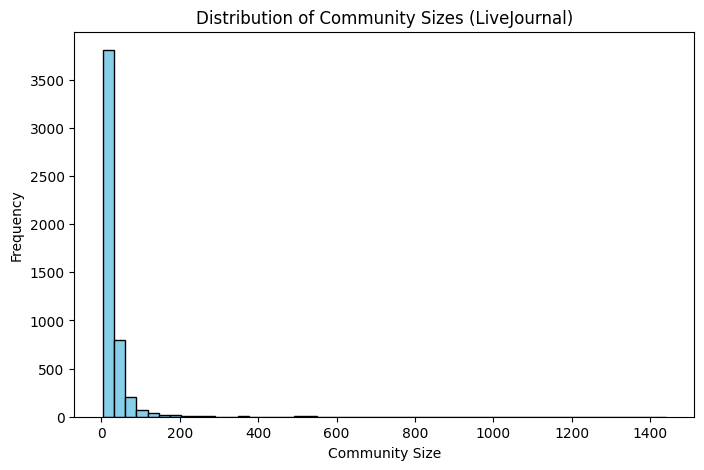

In [5]:
# Visualization: Simple histogram of community sizes

import matplotlib.pyplot as plt

if os.path.exists(file_path):
    plt.figure(figsize=(8, 5))
    plt.hist(community_sizes, bins=50, color='skyblue', edgecolor='black')
    plt.title("Distribution of Community Sizes (LiveJournal)")
    plt.xlabel("Community Size")
    plt.ylabel("Frequency")
    plt.show()


**e. Explanation**  
Communities in a network significantly influence the flow of information and can drive how quickly ideas, trends, or behaviors spread. A closely-knit group (high cohesiveness) can rapidly share knowledge internally. This makes identifying and understanding these communities crucial for areas like marketing, public health interventions, or content recommendations.

**f. Community Significance Metrics**  
- **Size**: The number of nodes in a community can determine how impactful it might be within the larger network.  
- **Density**: Measures how many edges exist among members relative to the maximum possible number of edges.  
- **Internal vs. External Links**: A community with significantly more internal edges than external edges is generally considered cohesive.

---

**g. Practical Activities/Codes (using LiveJournal dataset)**

1. **Loading and Parsing**: Learners can write or modify the code above to load the file and explore community statistics.  
2. **Generating a Bar Chart or Histogram**: As shown, use plotting libraries to visualize how community sizes are distributed.  

**h. Challenges in Defining Communities**  
- **Overlapping vs. Disjoint**: Users in real social networks may belong to multiple groups or communities simultaneously.  
- **Definition Variance**: The results can differ dramatically depending on whether you define communities by internal density, modularity, or other criteria.
### **Quiz**

1. **Short questions testing understanding of community definitions and importance:**
   - What is a “community” in the context of network analysis?  
   - Why is community detection vital for complex networks?  
   - Give one real-world example where identifying communities might be beneficial.

### **Activities to Practice**

1. **Write a Short Paragraph**  
   - Explain why community detection matters for social platforms. Discuss how it could influence new features or policies.

2. **Explore the Dataset**  
   - Identify the largest and smallest communities from the dataset.  
   - Share your observations on the distribution of community sizes and why this might matter in real-world applications.


## 6.2 Algorithms: Modularity Optimization, Spectral Clustering, Louvain Method

**Overview**

**a. Objective**  
- Introduce popular algorithms for community detection  
- Compare their theoretical foundations and practical uses  

**b. Introduction**  
- High-level overview of modularity-based methods and spectral methods  
- Brief mention of hierarchical approaches like Louvain  

**c. Modularity Optimization Concepts**  
- Explanation of modularity and why maximizing it helps identify communities  
- Trade-offs and known limitations of modularity  

**d. Examples/Codes (using LiveJournal dataset)**  
- Demonstrating modularity-based community detection on a subset of the data  
- Visualization of detected communities and modularity score  

**e. Explanation**  
- Differences between spectral clustering and modularity approaches  
- How Louvain method iteratively refines community partitions  

**f. Spectral Clustering and Graph Laplacian**  
- Importance of eigenvectors in clustering  
- Steps for applying spectral clustering to real-world networks  

**g. Practical Activities/Codes (using LiveJournal dataset)**  
- Running a simple spectral clustering library function on the dataset  
- Visual comparison of results from modularity optimization and spectral clustering  

**h. Louvain Method Insights**  
- Implementation details and typical runtime advantages  
- Suitability for large-scale datasets, such as LiveJournal  


### **b. Introduction: Modularity and Spectral Methods**

Community detection algorithms come in many varieties, but two major approaches are:

- **Modularity-Based Methods**: These revolve around the concept of modularity, a measure of how densely connected the nodes are within communities compared to random chance.  
- **Spectral Methods**: These rely on the spectral properties of matrices derived from the network graph (such as the Laplacian).  

A **hierarchical** method like **Louvain** builds communities from small clusters up to larger clusters, refining partitions iteratively.

---

### **c. Modularity Optimization Concepts**

1. **Modularity**:  
   Modularity \( Q \) measures the difference between the actual fraction of edges within communities and the fraction of edges we would expect in a randomized network with the same degree sequence. Higher \( Q \) suggests better-defined communities.

2. **Trade-offs / Limitations**:  
   - The **resolution limit** problem: Modularity might merge smaller communities into larger ones, losing fine-grained details.  
   - Computational cost on very large networks can be high, though optimizations exist.

---

### **d. Examples/Codes (using LiveJournal dataset)**

Below, we demonstrate how to implement or pseudo-implement a modularity-based method on a smaller portion of the LiveJournal data. For large datasets, these algorithms can be computationally heavy.


In [6]:
# d. Examples/Codes: Simple Modularity-Based Community Detection

# Note: This example uses NetworkX for demonstration.
# We assume the 'communities' list from previous sections is available,
# but let's also generate a smaller subset to keep it manageable.

!pip install networkx
import networkx as nx

# Example function: build a small graph from the first few communities
def build_small_graph(communities, max_nodes=2000):
    """
    Build a smaller graph from the list of community definitions.
    Each line in 'communities' is a list of node IDs belonging to a community.
    We'll create edges by connecting all nodes within each listed community.
    """
    G = nx.Graph()
    node_count = 0
    for c in communities:
        for node in c:
            if node_count < max_nodes:  # limit total number of nodes
                G.add_node(node)
            else:
                break
        node_count += len(c)
        if node_count >= max_nodes:
            break

    # Re-iterate to add edges for the included nodes
    for c in communities:
        nodes_in_c = [n for n in c if n in G.nodes()]
        for i in range(len(nodes_in_c)):
            for j in range(i+1, len(nodes_in_c)):
                G.add_edge(nodes_in_c[i], nodes_in_c[j])
        if len(G.nodes()) >= max_nodes:
            break

    return G

# Build a small test graph
if 'communities' in globals():
    G_small = build_small_graph(communities, max_nodes=500)
    print(f"Constructed small graph with {G_small.number_of_nodes()} nodes and {G_small.number_of_edges()} edges.")
else:
    print("Please load the 'communities' list first.")


Constructed small graph with 486 nodes and 515 edges.


In [7]:
# Using a built-in community detection approach (e.g., networkx.algorithms.community)
# Note: networkx has a method for the Louvain algorithm, but it may not be in the standard library.
# For demonstration, let's do a naive modularity-based approach or the greedy_modularity_communities:

from networkx.algorithms.community import greedy_modularity_communities

if 'G_small' in globals():
    communities_mod = greedy_modularity_communities(G_small)
    print(f"Detected {len(communities_mod)} communities using greedy_modularity_communities.")
    # Print size of the first few communities
    for idx, comm in enumerate(list(communities_mod)[:3]):
        print(f"Community {idx} size:", len(comm))


Detected 157 communities using greedy_modularity_communities.
Community 0 size: 4
Community 1 size: 4
Community 2 size: 4


### **e. Explanation**

- **Spectral Clustering vs. Modularity**:  
  Modularity optimization typically tries to group nodes to maximize \( Q \). In **spectral clustering**, we use eigenvectors of the graph Laplacian to identify natural cuts in the graph.  

- **Louvain Method**:  
  This is a popular hierarchical approach, which starts with small clusters and merges them iteratively to increase modularity. Each pass refines the community assignments until no further improvement is possible.

---

### **f. Spectral Clustering and Graph Laplacian**

1. **Graph Laplacian**: The Laplacian \( L = D - A \) is the difference between the degree matrix \( D \) and adjacency matrix \( A \).  
2. **Eigenvectors**: The eigenvectors of \( L \) (often focusing on the smallest eigenvalues) can reveal natural splits in the graph.  
3. **Implementation Steps**:  
   - Construct the adjacency or Laplacian matrix.  
   - Compute a fixed number of eigenvectors (k).  
   - Cluster the data in that new eigen-space, often with K-means.

---

### **g. Practical Activities/Codes (using LiveJournal dataset)**

**Activity 1**: *Spectral Clustering on a Sub-sample*

Try to accomplish basic spectral clustering on `G_small`. In a new code cell, install a library such as `scikit-learn` or use `networkx` functions to perform spectral clustering. Compare the results to the greedy modularity approach.

**Activity 2**: *Modularity vs. Spectral Results*

After performing both techniques (modularity-based and spectral-based), visualize or compare how many communities you get and their approximate sizes.  

---

### **h. Louvain Method Insights**

1. **Implementation Details**: Louvain typically requires repetitive passes over the nodes to find moves that locally increase modularity.  
2. **Runtime Advantages**: Scales better than many other methods on large graphs, such as our LiveJournal data.  
3. **Suitability**: Often the go-to approach for big networks due to its balance of performance and speed.

---

### **Quiz**

Multiple-choice questions on algorithmic differences (modularity vs. spectral vs. Louvain).  
1. Which approach is known for the resolution limit issue?  
2. Which approach relies on eigenvectors of the graph Laplacian?  
3. Which method iteratively merges communities to maximize modularity?

---

### **Activities to Practice**

1. **Experiment with Two Algorithms**  
   - Pick any two from (Greedy Modularity, Spectral, Louvain).  
   - Run them on a smaller subset of the LiveJournal data.  
   - Document the differences in the communities detected (e.g., size, count).  

2. **Observations**  
   - Discuss any discrepancies or similarities in the identified communities.  
   - Reflect on potential reasons (e.g., different objectives, resolution limit).


## 6.3 Applications in Detecting Groups in Social Networks and Protein-Protein Interactions

**Overview**

**a. Objective**  
- Show how community detection algorithms are applied beyond social networks  
- Emphasize cross-domain importance of clustering in graphs  

**b. Introduction**  
- Common use cases: friend recommendation, marketing, biology research  
- Value of communities in specialized domains (e.g., functional modules in protein networks)  

**c. Social Network Group Detection**  
- Identifying influential groups for targeted advertising  
- Tracking community evolution over time  

**d. Examples/Codes (using LiveJournal dataset)**  
- Highlight real groups in the LiveJournal data (e.g., hobby groups, fan clubs)  
- Visualization of a specific community and its members  

**e. Explanation**  
- How insights from social network communities translate to business or policy decisions  
- Key metrics (centrality, density) that reveal community roles  

**f. Protein-Protein Interaction (PPI) Networks**  
- Biological analogy: communities as functional modules  
- Relevance of dense subgraphs in understanding protein complexes  

**g. Practical Activities/Codes (using LiveJournal dataset)**  
- Draw parallels between social network clusters and hypothetical PPI data  
- Modify code to treat user communities as “functional modules” in a mock scenario  

**h. Cross-Domain Challenges**  
- Different data scales and noise levels in social vs. biological networks  
- Importance of domain knowledge when interpreting communities  
### **b. Introduction: Applications Across Domains**

Community detection goes beyond social networks. In online platforms, detecting groups can help tailor recommendations and identify influential communities. In biological networks, finding densely connected subgraphs can reveal underlying functionalities, like protein complexes or gene regulatory modules.

---

### **c. Social Network Group Detection**

1. **Influential Groups for Targeted Advertising**  
   By identifying groups with high internal connectivity, marketers can more effectively focus on specific communities. This can optimize advertising campaigns or outreach.

2. **Community Evolution**  
   Communities are not static; monitoring how they grow, shrink, or split can provide insights into user behavior, brand loyalty, or social movements.

---

### **d. Examples/Codes (using LiveJournal dataset)**

Below is an example of how we might look for a specific community in the LiveJournal dataset and attempt to visualize it.


Visualizing community index: 9
Number of nodes in this community: 3


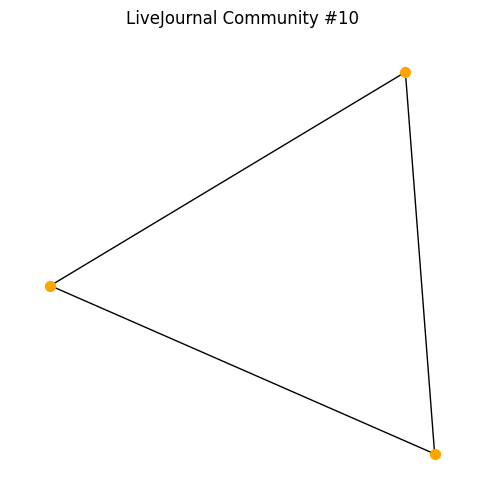

In [8]:
# d. Examples/Codes: Highlight a real group from the LiveJournal data

import os
import networkx as nx
import matplotlib.pyplot as plt

file_path = 'com-lj.top5000.cmty.txt'

if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        communities = [line.strip().split() for line in f if line.strip()]

    # Let's assume we pick the 10th community as an example (arbitrarily).
    # Convert it to a small subgraph for visualization.
    community_index = 9  # 10th community in 0-based indexing
    chosen_community = communities[community_index]

    G_community = nx.Graph()
    G_community.add_nodes_from(chosen_community)

    # In reality, we would need an edge list or adjacency data to link these nodes.
    # For demonstration, let's assume all nodes in this community form a clique.
    for i in range(len(chosen_community)):
        for j in range(i+1, len(chosen_community)):
            G_community.add_edge(chosen_community[i], chosen_community[j])

    print(f"Visualizing community index: {community_index}")
    print(f"Number of nodes in this community: {len(chosen_community)}")

    plt.figure(figsize=(6,6))
    nx.draw_networkx(G_community, with_labels=False, node_size=50, node_color='orange')
    plt.title(f"LiveJournal Community #{community_index + 1}")
    plt.axis('off')
    plt.show()
else:
    print("File not found. Please ensure 'com-lj.top5000.cmty.txt' is present.")


### **e. Explanation**

- **Social Network Communities & Business/Policy Decisions**  
  Identifying a thriving fan club or interest group can guide how a platform might suggest new groups or content. Networks with high centrality nodes can be targeted for disseminating public health campaigns or political messages.

- **Role of Centrality and Density**  
  - **Centrality** (e.g., degree, betweenness) indicates how critical certain nodes are within the community.  
  - **Density** relates to how interconnected the group is, impacting information flow and community stability.

---

### **f. Protein-Protein Interaction (PPI) Networks**

In biological settings, a group of proteins that frequently interact with each other may represent a functional module. Identifying such modules helps in discovering protein complexes, understanding pathways, and hypothesizing gene functions. PPI networks often resemble social networks in that “communities” or “clusters” can indicate functional groupings.

---

### **g. Practical Activities/Codes (using LiveJournal dataset)**

**Activity 1**: *Social-to-Biological Analogy*  
Draw parallels between a social network cluster and a hypothetical protein cluster.  


In [9]:
# Activity 1: Code skeleton

def map_social_community_to_biological(community_nodes):
    """
    Pretend each node in this social community is a 'protein'.
    Return a hypothetical functional annotation or modular grouping for demonstration.
    """
    # For the sake of demonstration, randomly assign an annotation or pretend to read from a file
    import random
    annotations = {}
    possible_functions = ["Regulation", "Metabolism", "SignalTransduction", "Defense"]

    for node in community_nodes:
        annotations[node] = random.choice(possible_functions)
    return annotations

# Try it on the chosen_community from the code above:
if 'chosen_community' in globals():
    mock_annotations = map_social_community_to_biological(chosen_community)
    # Print the first few mappings
    list_items = list(mock_annotations.items())[:5]
    for item in list_items:
        print("Node:", item[0], "| Function:", item[1])


Node: 1533170 | Function: Regulation
Node: 2821108 | Function: Defense
Node: 2821109 | Function: Defense


**Activity 2**: *Modifying the Community Code*  
- Modify or extend the code to cluster “proteins” based on shared annotations or co-occurrence in the same community.  
- Visualize a mock PPI network, assigning edges if two proteins (nodes) share the same assigned “function.”

Immediately after running these activities, think about how similar (or different) the resulting structures are from actual social clusters.

---

### **h. Cross-Domain Challenges**

1. **Data Scale & Noise**  
   Biological data often has more noise and uncertainty compared to many social network datasets. Overfitting or mislabeling can be common if the data is incomplete.  
2. **Domain Knowledge**  
   In social networks, user behavior shapes group formation, whereas in biological systems, physical interactions or genetic relationships define communities. Interpreting clusters correctly requires different expertise.

---

### **Quiz**

1. **Short answer questions on cross-domain parallels**:  
   - How does a community in a social network compare to a functional module in a PPI network?  
   - Name two potential pitfalls of directly applying social network methods to PPI data.  

---

### **Activities to Practice**

1. **Research a Real Example**: Find a research study or article where community detection in a biological network led to a significant discovery. Summarize the key findings in a short paragraph.  
2. **LiveJournal Connection**: Reflect on how identifying user groups in a social network might follow a similar approach to analyzing functional modules in biological data.


## 6.4 Implementing Community Detection on Benchmark Datasets

**Overview**

**a. Objective**  
- Demonstrate end-to-end workflows for community detection  
- Showcase reproducible experiments on known benchmark datasets  

**b. Introduction**  
- Common benchmark datasets: LiveJournal, Facebook, email networks  
- Importance of reproducibility and open-source implementations  

**c. Dataset Preparation**  
- Steps for cleaning or preprocessing the LiveJournal file (duplicates, incomplete data)  
- Managing memory and large file considerations  

**d. Examples/Codes (using LiveJournal dataset)**  
- Building a pipeline: load data, apply algorithm, compute metrics  
- Visualization of the final communities in a chart or network diagram  

**e. Explanation**  
- Interpreting the results with modularity score or other quality metrics  
- Techniques to validate or compare multiple algorithms  

**f. Scalability Factors**  
- Considering time and space complexity when handling millions of edges  
- Possible optimizations like parallel computing  

**g. Practical Activities/Codes (using LiveJournal dataset)**  
- Implement a modular pipeline for repeated experiments (e.g., run multiple algorithms)  
- Record runtime and community quality metrics in a table  

**h. Result Interpretation and Reporting**  
- Summarizing findings with visual and numerical outputs  
- Best practices for reporting community detection outcomes in research or business  


### **b. Introduction: Benchmark Datasets and Reproducibility**

Community detection is most useful when experiments can be repeated and validated across different datasets.  
- **LiveJournal** is one of many well-known network datasets (others include Facebook, email networks, or citation networks).  
- **Reproducibility**: Using openly available data and standardized code ensures that results can be compared across studies.

---

### **c. Dataset Preparation**

1. **Cleaning & Preprocessing**:  
   - Remove any duplicate lines or malformed data.  
   - Check for disconnected components if relevant.  

2. **Memory Management**:  
   - Large community data can be gigabytes in size.  
   - Consider chunked loading or streaming if the dataset is extremely large.

Below is an example snippet reviewing how we might preprocess or verify the LiveJournal file.


In [10]:
# c. Dataset Preparation Example (LiveJournal)

import os

file_path = 'com-lj.top5000.cmty.txt'

if os.path.exists(file_path):
    with open(file_path, 'r') as f:
        raw_lines = [line.strip() for line in f if line.strip()]

    # Example check for duplicates
    unique_lines = set(raw_lines)
    print(f"Total lines read: {len(raw_lines)}")
    print(f"Unique lines (possible communities): {len(unique_lines)}")

    # Convert each line to a list of node IDs
    communities = [line.split() for line in unique_lines]
    print("Example community:", communities[0][:10])
else:
    print("com-lj.top5000.cmty.txt not found in the directory.")


Total lines read: 5000
Unique lines (possible communities): 4703
Example community: ['2543244', '3979915', '3979919', '3979920', '3979921', '3979922', '3979923', '3979924', '3979925', '3979926']


### **d. Examples/Codes (using LiveJournal dataset)**

To illustrate an end-to-end pipeline:
1. **Load** the data.  
2. **Apply** a chosen algorithm (e.g., Louvain).  
3. **Compute** metrics (like modularity).  
4. **Visualize** the resulting communities.



Graph built with 501 nodes and 378 edges.
Detected communities: 474
Modularity of this partition: 0.0000


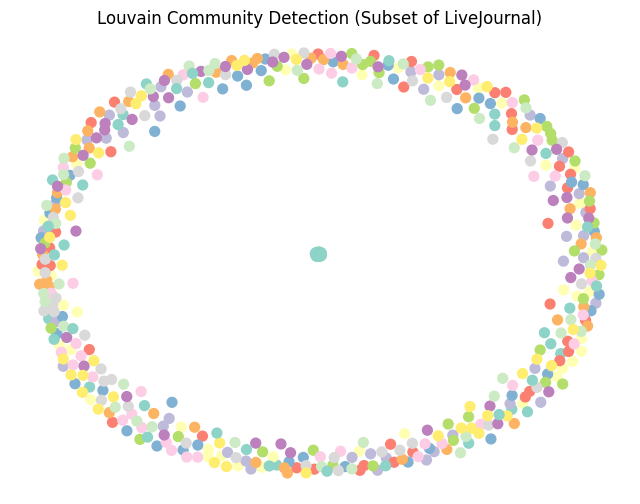

In [12]:
# d. Pipeline Example: Loading, Applying Algorithm, and Simple Metrics

!pip install networkx python-louvain
import networkx as nx
from community import community_louvain  # Implementation of the Louvain method
import matplotlib.pyplot as plt

# Build a small graph from first few communities to avoid memory issues in this demo
def build_graph(communities, max_nodes=1000):
    G = nx.Graph()
    node_count = 0
    for c in communities:
        for node in c:
            if node not in G:
                G.add_node(node)
            node_count += 1
            if node_count > max_nodes:
                break
        if node_count > max_nodes:
            break
    # For demonstration, artificially connect nodes within each community
    for c in communities:
        valid_nodes = [n for n in c if n in G.nodes()]
        for i in range(len(valid_nodes)):
            for j in range(i+1, len(valid_nodes)):
                G.add_edge(valid_nodes[i], valid_nodes[j])
        if len(G.nodes()) >= max_nodes:
            break
    return G

if 'communities' in globals():
    G_small = build_graph(communities, max_nodes=500)
    print(f"Graph built with {G_small.number_of_nodes()} nodes and {G_small.number_of_edges()} edges.")

    # Apply Louvain
    partition = community_louvain.best_partition(G_small)
    num_communities = len(set(partition.values()))
    print("Detected communities:", num_communities)

    # Simple metric: modularity
    mod_score = community_louvain.modularity(partition, G_small)
    print(f"Modularity of this partition: {mod_score:.4f}")

    # Visualization of final communities (color by partition)
    plt.figure(figsize=(8,6))
    pos = nx.spring_layout(G_small, seed=42)
    colors = [partition[node] for node in G_small.nodes()]
    nx.draw_networkx(G_small, pos, node_color=colors, node_size=50, with_labels=False, cmap=plt.cm.Set3)
    plt.title("Louvain Community Detection (Subset of LiveJournal)")
    plt.axis('off')
    plt.show()
else:
    print("Please run the dataset preparation step first.")


### **e. Explanation**

After building a pipeline, we interpret results by examining:
- **Modularity**: Gives a sense of how well-defined the communities are.  
- **Number of Communities**: An excessive count might indicate over-partitioning, while too few communities may hide important substructures.  

We can compare multiple algorithms (e.g., Louvain, Greedy Modularity, Spectral) on the same dataset to see if results are consistent or vary significantly.

---

### **f. Scalability Factors**

With millions of edges (as can occur in full LiveJournal or even bigger networks):
1. **Time Complexity**: Some methods (like spectral clustering) become expensive on large graphs.  
2. **Parallel/Distributed Computing**: Tools like Spark, Dask, or HPC clusters can help.  
3. **Iterative & Heuristic Approaches**: Methods like Louvain are popular for large-scale networks due to their relatively efficient iterative nature.

---

### **g. Practical Activities/Codes (using LiveJournal dataset)**

**Activity 1**: *Modular Pipeline*  
Try to create a pipeline function that:
1. Reads the dataset.  
2. Builds a graph.  
3. Applies two different community detection algorithms.  
4. Logs out metrics (like modularity) and runtime.



In [14]:
# Activity 1 Starter Code

import time

def run_multiple_algorithms(communities, max_nodes=500):
    """
    Build a smaller graph, run two algorithms,
    and report modularity and time taken for each.
    """
    G_small = build_graph(communities, max_nodes=max_nodes)

    results = {}

    # Louvain
    start_louvain = time.time()
    partition_louvain = community_louvain.best_partition(G_small)
    louvain_modularity = community_louvain.modularity(partition_louvain, G_small)
    end_louvain = time.time()

    results["louvain"] = {
        "modularity": louvain_modularity,
        "num_communities": len(set(partition_louvain.values())),
        "time_s": round(end_louvain - start_louvain, 3)
    }

    # Greedy Modularity
    start_greedy = time.time()
    from networkx.algorithms.community import greedy_modularity_communities
    greedy_communities = greedy_modularity_communities(G_small)
    end_greedy = time.time()

    # Convert set of frozensets to a partition dict for modularity calculation
    partition_greedy = {}
    idx = 0
    for cset in greedy_communities:
        for node in cset:
            partition_greedy[node] = idx
        idx += 1
    greedy_mod = community_louvain.modularity(partition_greedy, G_small)

    results["greedy"] = {
        "modularity": greedy_mod,
        "num_communities": len(greedy_communities),
        "time_s": round(end_greedy - start_greedy, 3)
    }

    return results


**Activity 2**: *Record Results in a Table*  
- Extend the code to print or store results in a Pandas DataFrame.  
- Compare which method yields the best modularity and which is fastest.

---

### **h. Result Interpretation and Reporting**

1. **Visual and Numerical Summaries**:  
   Always combine a metric (like modularity) with a qualitative look at your communities. A purely numerical approach may overlook interpretive subtleties.

2. **Best Practices**:  
   - Document your code, parameters, and dataset versions.  
   - Provide clear visualizations (plots, tables) for each experiment.  
   - Consider saving partitions or community lists for future reference.

---

### **Quiz**

1. **True/False**: Louvain is generally less scalable than spectral clustering for very large networks.  
2. **Short Answer**: Why might we see drastically different community structures when using different algorithms on the same dataset?

---

### **Activities to Practice**

1. **Complete Pipeline on a Smaller Dataset**  
   - Run the entire pipeline (load → algorithm → evaluate) on a subset of LiveJournal.  
   - Then, if resources allow, scale up to the full dataset.  

2. **Compare Implementations**  
   - For Louvain, try a Python library vs. a C++ implementation (if available).  
   - Observe differences in speed and final modularity or community count.


## 6.5 Evaluation, Advanced Topics, and Conclusion

**Overview**

**a. Objective**  
- Provide insights into evaluating community detection methods  
- Introduce advanced topics and finalize the unit  

**b. Introduction**  
- Overview of community evaluation metrics (ARI, NMI, F-measure)  
- The gap between theoretical performance and real-world results  

**c. Evaluation Metrics**  
- In-depth explanation of Normalized Mutual Information (NMI)  
- Importance of ground-truth comparisons (if available)  

**d. Examples/Codes (using LiveJournal dataset)**  
- Demonstrating evaluation metrics for communities discovered in previous sections  
- Simple comparison chart of different algorithms’ performance metrics  

**e. Explanation**  
- Common pitfalls (overfitting, resolution limit in modularity)  
- Importance of domain context when interpreting metric scores  

**f. Advanced Topics**  
- Overlapping communities and fuzzy clustering methods  
- Dynamic community detection for temporal networks  

**g. Practical Activities/Codes (using LiveJournal dataset)**  
- Implement or integrate a library to calculate evaluation metrics  
- Attempt overlapping detection on a small sub-sample, if feasible  

**h. Conclusion and Further Study**  
- Recap of main takeaways from community detection research  
- Recommended resources for deeper exploration  
### **b. Introduction: Evaluation Metrics and Real-World Gaps**

Evaluating community detection often involves comparing the discovered communities to a “ground truth” or using objective measures like **Normalized Mutual Information (NMI)** or **Adjusted Rand Index (ARI)**. However, real-world data may be noisy, incomplete, or without a clear definition of ground-truth communities, making evaluation trickier. Theoretical improvements may not always translate into better real-world performance due to network complexity and dynamic changes.

---

### **c. Evaluation Metrics**

1. **Normalized Mutual Information (NMI)**  
   - Compares two partitions (the detected communities vs. ground truth).  
   - Ranges from 0 (no agreement) to 1 (perfect match).

2. **Adjusted Rand Index (ARI)**  
   - Accounts for random chance in clustering agreements.  
   - More robust than simple accuracy measures for partition comparisons.

3. **F-Measure / Precision-Recall**  
   - Sometimes used when ground-truth labels are known.  
   - Balances how many nodes are correctly grouped vs. incorrectly grouped.

4. **Practical Concern**:  
   - Not all datasets have a definitive ground truth, so algorithmic comparison might rely solely on internal metrics like **modularity** or silhouette scores.

---

### **d. Examples/Codes (using LiveJournal dataset)**

Below is an example of how you might compute a simple evaluation metric like NMI if you have a known “ground truth” partition. For demonstration, we treat the original community file as ground truth.



In [16]:
# d. Example: Computing NMI in Python
# We'll assume the "communities" variable represents our ground-truth partition
# and "predicted_partition" some dictionary where node -> predicted community ID.

!pip install scikit-learn  # <-- Use scikit-learn instead of sklearn
from sklearn.metrics import normalized_mutual_info_score
import networkx as nx

# Mock: Suppose we have a function that translates "communities" into a ground_truth dict
def build_ground_truth_dict(communities):
    gt_dict = {}
    cluster_id = 0
    for c in communities:
        for node in c:
            gt_dict[node] = cluster_id
        cluster_id += 1
    return gt_dict

# Similarly, assume we have a predicted partition from an algorithm
def example_predicted_partition(G_small):
    """
    This is just an example that assigns each node to its own community.
    Obviously not a good solution, but for demonstration.
    """
    pred_partition = {}
    unique_id = 0
    for node in G_small.nodes():
        pred_partition[node] = unique_id
        unique_id += 1
    return pred_partition

if 'communities' in globals():
    ground_truth_dict = build_ground_truth_dict(communities[:500])  # partial for demonstration
    if 'G_small' in globals():
        predicted_dict = example_predicted_partition(G_small)

        # Extract node labels from both dicts (only for common nodes)
        common_nodes = set(ground_truth_dict.keys()).intersection(set(predicted_dict.keys()))
        true_labels = [ground_truth_dict[n] for n in common_nodes]
        pred_labels = [predicted_dict[n] for n in common_nodes]

        # Calculate NMI
        nmi_score = normalized_mutual_info_score(true_labels, pred_labels)
        print(f"Mock NMI Score: {nmi_score:.3f}")
    else:
        print("No predicted partition found. Please generate 'G_small' and try again.")
else:
    print("Please load or define 'communities' first.")


Mock NMI Score: 0.648


### **e. Explanation**

- **Overfitting**: An algorithm might try to create many small communities to inflate certain metrics.  
- **Resolution Limit in Modularity**: Large networks may “hide” small communities due to how modularity aggregates edges.  
- **Domain Context**: In social networks, the best metric might focus on user engagement rather than purely structural metrics.

---

### **f. Advanced Topics**

1. **Overlapping Communities and Fuzzy Clustering**  
   - Real-world networks often have nodes in multiple groups. Techniques like fuzzy clustering assign degrees of membership.

2. **Dynamic Community Detection**  
   - Networks evolve. Analyzing community changes over time gives insights into growth, decay, or merging of communities.

---

### **g. Practical Activities/Codes (using LiveJournal dataset)**

**Activity 1**: *Implement a Library for Evaluation*  
- Use an established library (like `sklearn` or a specialized community detection library) to compute ARI or NMI on your predicted partitions vs. the ground truth.  
- Explore how the score changes if you tweak the algorithm parameters.



In [17]:
# Activity 1 Starter Code

def compute_ari(true_partition, predicted_partition):
    """
    A function to compute Adjusted Rand Index.
    true_partition and predicted_partition should be dicts of node->communityID.
    Returns the ARI score.
    """
    from sklearn.metrics import adjusted_rand_score

    common_nodes = set(true_partition.keys()).intersection(set(predicted_partition.keys()))
    true_labels = [true_partition[n] for n in common_nodes]
    pred_labels = [predicted_partition[n] for n in common_nodes]
    ari_value = adjusted_rand_score(true_labels, pred_labels)
    return ari_value

# Try to accomplish computing ARI with your own predicted partition


**Activity 2**: *Overlap Detection*  
- Modify or augment your community detection approach to allow nodes to appear in multiple clusters.  
- Compare how the metrics (NMI, ARI) handle overlapping partitions (hint: might require specialized versions of these metrics).

---

### **h. Conclusion and Further Study**

1. **Key Takeaways**:  
   - Evaluation requires both quantitative metrics (e.g., NMI) and qualitative/contextual checks.  
   - Overlapping and dynamic communities add layers of complexity.

2. **Additional Resources**:  
   - **Papers**: “Community detection in graphs” by Santo Fortunato.  
   - **Libraries**: `cdlib`, `igraph`, `networkx` advanced modules.

---

### **Quiz**

1. **Evaluation Metrics**: What metric compares discovered partitions with ground truth, adjusting for chance?  
2. **Advanced**: What is one reason overlapping communities are more realistic in many real-world networks?

---

### **Activities to Practice**

1. **Experiment**: Compare results when you partition the same data with an algorithm that generates overlapping communities vs. one that does not.  
2. **Reflection**: Write a short paragraph on how community detection might evolve for large dynamic networks (e.g., real-time social media).


# **Answers to Quizzes**

---

## **Answers for Unit 6.1**

1. **What is a “community” in the context of network analysis?**  
   A community is a group of nodes that are more densely connected to each other than to the rest of the network.

2. **Why is community detection vital for complex networks?**  
   It reveals underlying structures or clusters that can influence information flow, user behavior, or functional roles within the network.

3. **Real-world example where identifying communities might be beneficial**  
   In social media, finding tightly knit fan groups helps target recommendations or ads more effectively.

---

## **Answers for Unit 6.2**

1. **Which approach is known for the resolution limit issue?**  
   Modularity optimization can struggle with small communities because of the resolution limit.

2. **Which approach relies on eigenvectors of the graph Laplacian?**  
   Spectral clustering uses the eigenvectors of the Laplacian for partitioning.

3. **Which method iteratively merges communities to maximize modularity?**  
   The Louvain method refines communities in passes, merging them to improve modularity.

---

## **Answers for Unit 6.3**

1. **How does a community in a social network compare to a functional module in a PPI network?**  
   Both represent densely connected subsets of the larger network. In social settings, this often means shared interests or friendships; in biology, these are proteins that physically or functionally interact.

2. **Two potential pitfalls of directly applying social network methods to PPI data**  
   - Biological data may be noisier or incomplete, so social methods might overfit.  
   - PPI networks can have different connectivity dynamics, requiring domain-specific interpretations.

---

## **Answers for Unit 6.4**

1. **True/False: Louvain is generally less scalable than spectral clustering for very large networks**  
   False. Louvain tends to be more scalable on large networks due to its iterative aggregation approach.

2. **Why might we see drastically different community structures using different algorithms on the same dataset?**  
   Each algorithm optimizes or detects communities based on different criteria (e.g., modularity vs. eigenvalue gaps), leading to variations in the number and size of communities found.

---

## **Answers for Unit 6.5**

1. **Which metric compares discovered partitions with ground truth, adjusting for chance?**  
   Adjusted Rand Index (ARI) accounts for chance agreements in partitioning.

2. **One reason overlapping communities are more realistic in real-world networks**  
   Individuals (or nodes) often belong to multiple groups simultaneously, so strict partitioning may not capture the true complexity of relationships.
